In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
W = pd.read_csv("winequality-red.csv")
W

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
W.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
W.duplicated().sum()

240

In [5]:
W.drop_duplicates(subset = None , inplace = True)

In [6]:
W.duplicated().sum()

0

In [7]:
WCorr = W.corr()
WCorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

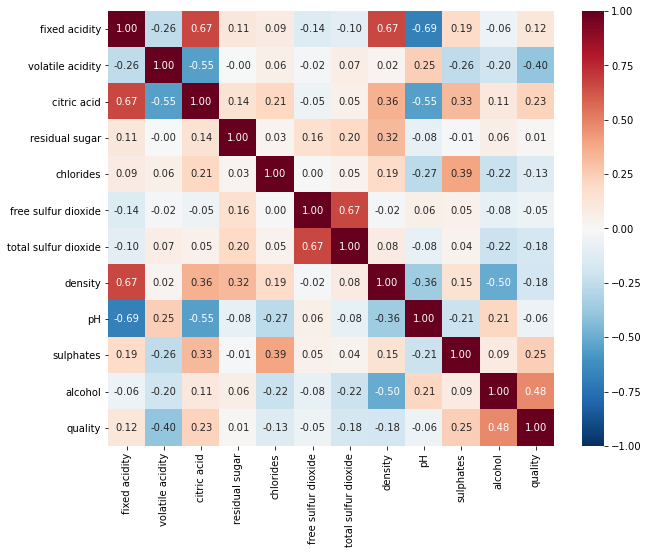

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(WCorr , annot=True , cmap="RdBu_r" , annot_kws={'size': 10}, fmt=".2f" , vmin=-1.0 , vmax = 1.0 , center = 0)

In [9]:
W['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<Figure size 1080x1080 with 0 Axes>

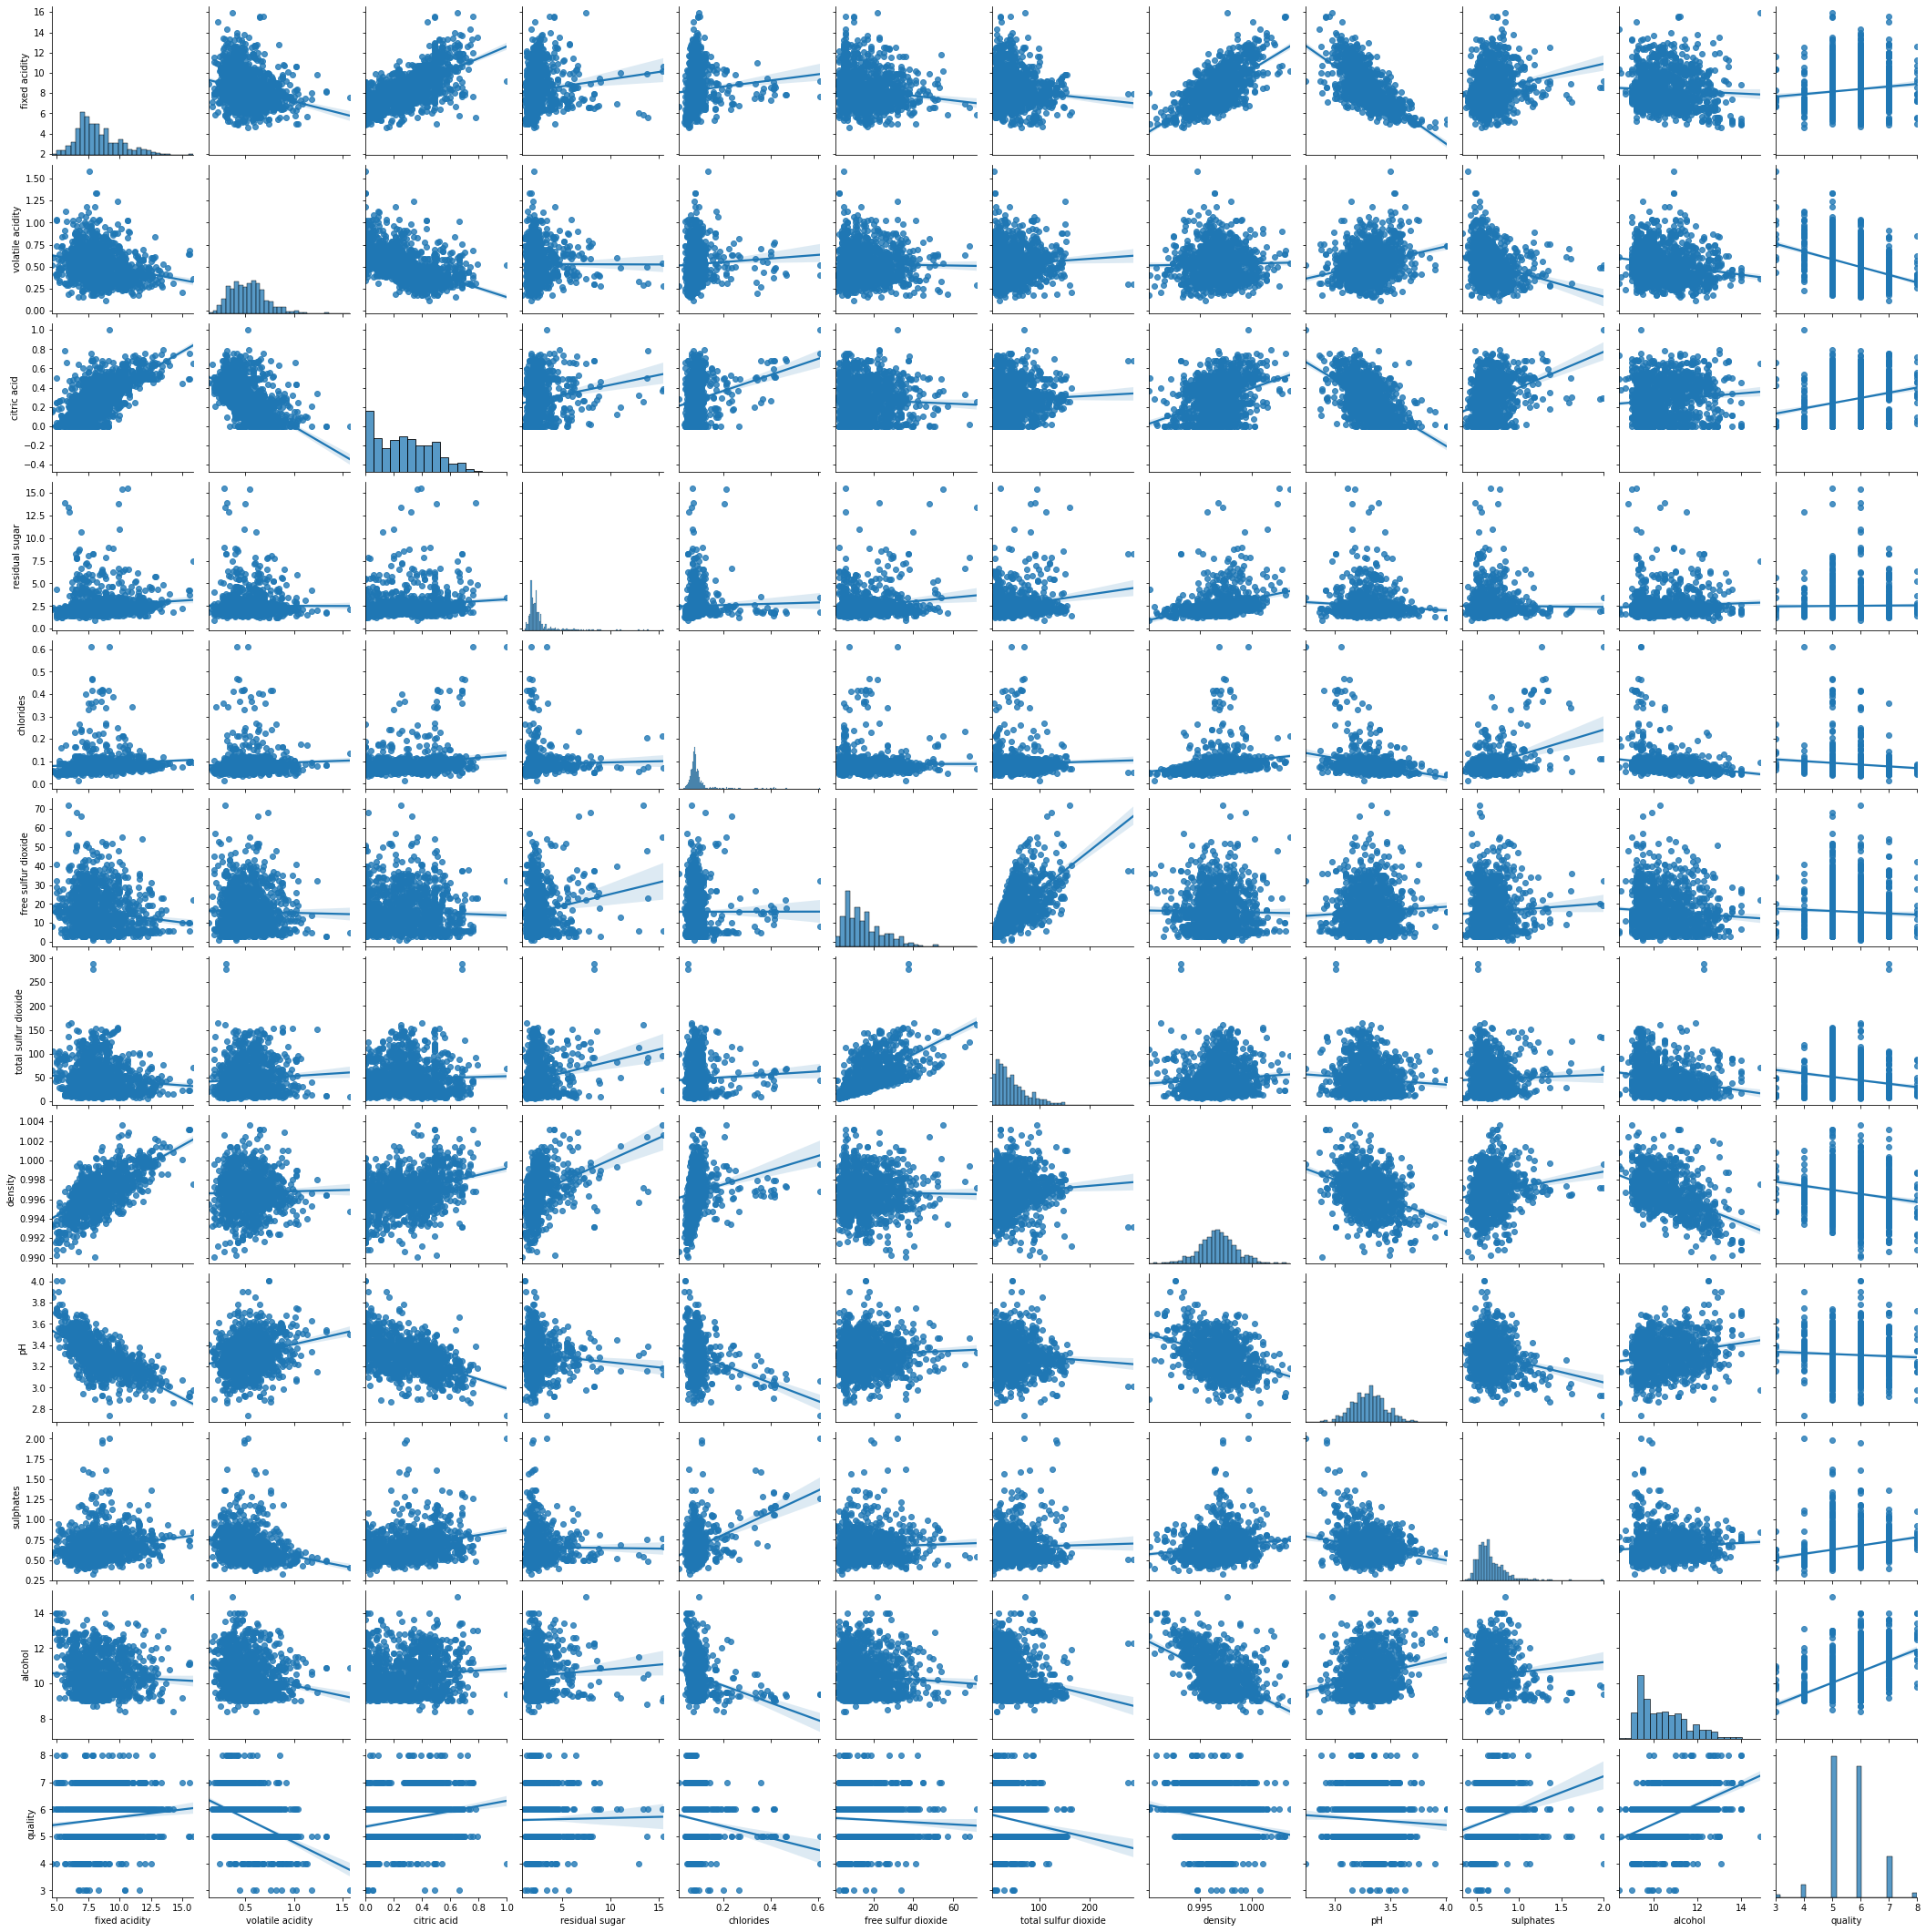

In [10]:
plt.figure(figsize=(15,15))
sns.pairplot(W , kind='reg')
#sns.set(font_scale=4)

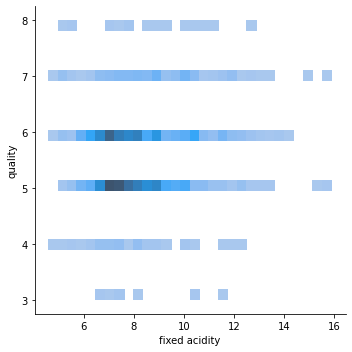

In [12]:
sns.displot(x=W["fixed acidity"], y= W['quality'], kind='hist')

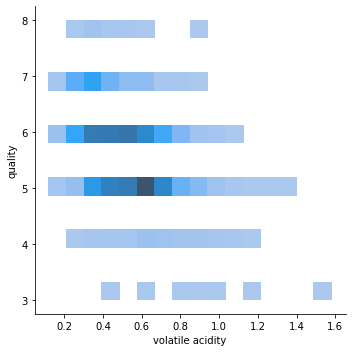

In [13]:
sns.displot(x=W["volatile acidity"], y=W["quality"], bins=16 )

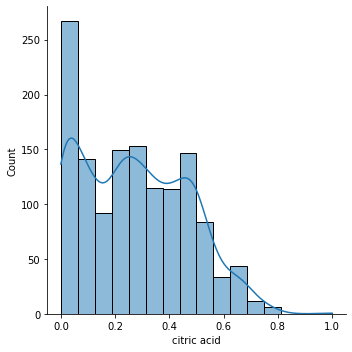

In [14]:
sns.displot(W["citric acid"], bins=16 , kde=True)

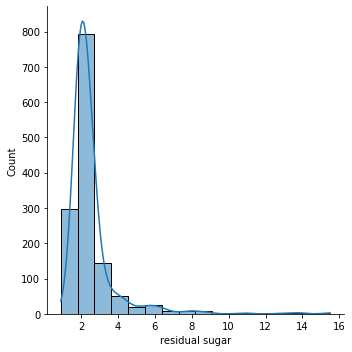

In [15]:
sns.displot(W["residual sugar"], bins=16 , kde=True)

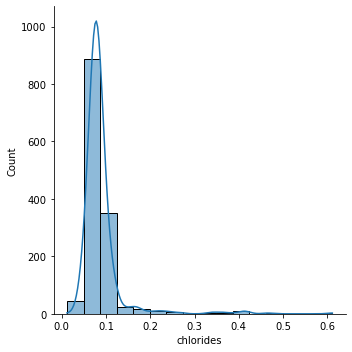

In [16]:
sns.displot(W["chlorides"], bins=16 , kde=True)

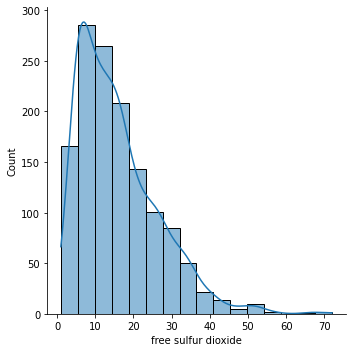

In [17]:
sns.displot(W["free sulfur dioxide"], bins=16 , kde=True)

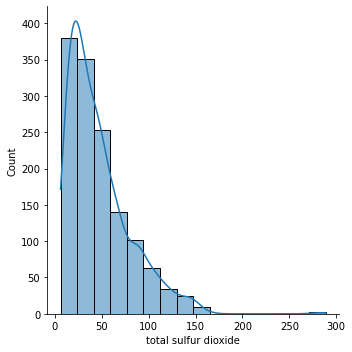

In [18]:
sns.displot(W["total sulfur dioxide"], bins=16 , kde=True)

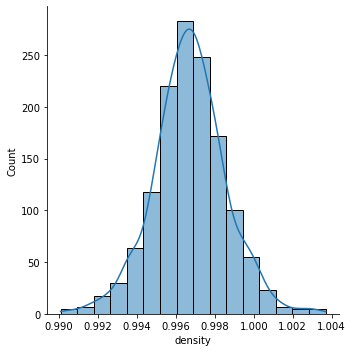

In [19]:
sns.displot(W["density"], bins=16 , kde=True)

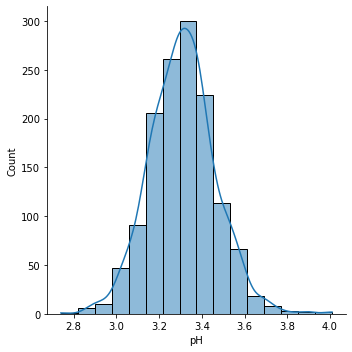

In [20]:
sns.displot(W["pH"], bins=16 , kde=True)

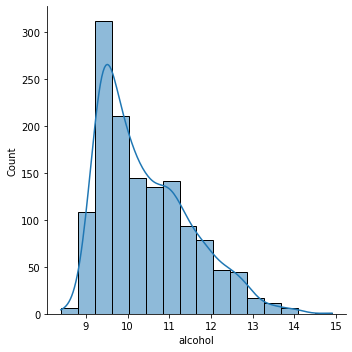

In [21]:
sns.displot(W["alcohol"], bins=16 , kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

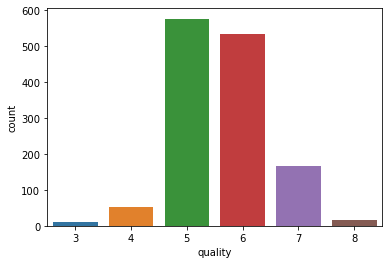

In [22]:
sns.countplot(W["quality"])

In [23]:
W.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

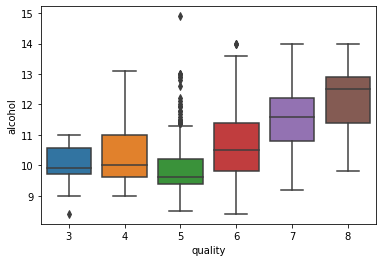

In [24]:
sns.boxplot(y = W["alcohol"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

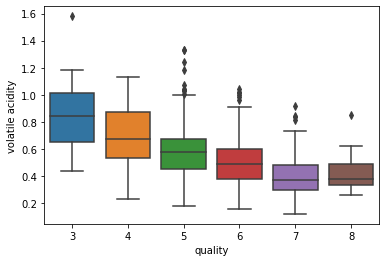

In [25]:
sns.boxplot(y = W["volatile acidity"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='pH'>

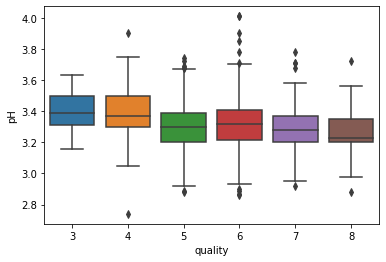

In [26]:
sns.boxplot(y = W["pH"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

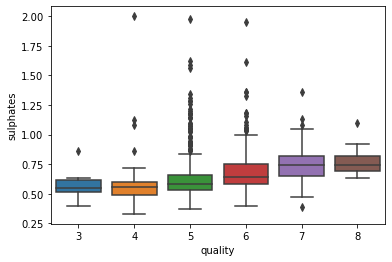

In [27]:
sns.boxplot(y = W["sulphates"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='density'>

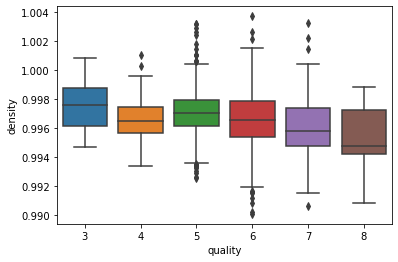

In [28]:
sns.boxplot(y = W["density"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

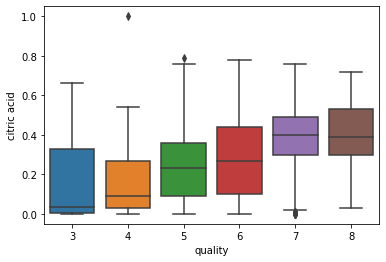

In [29]:
sns.boxplot(y = W["citric acid"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

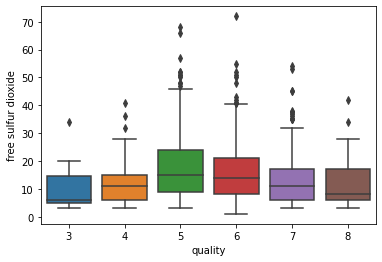

In [30]:
sns.boxplot(y = W["free sulfur dioxide"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

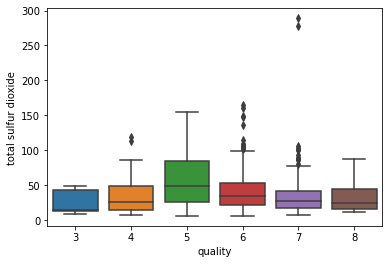

In [31]:
sns.boxplot(y = W["total sulfur dioxide"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

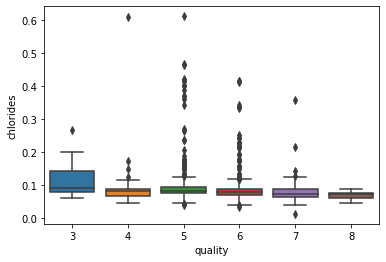

In [32]:
sns.boxplot(y = W["chlorides"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

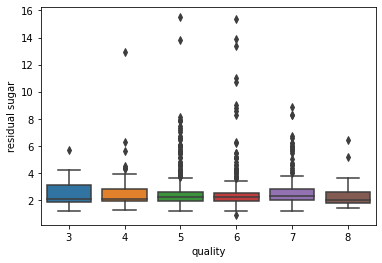

In [33]:
sns.boxplot(y = W["residual sugar"] , x = W["quality"])

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

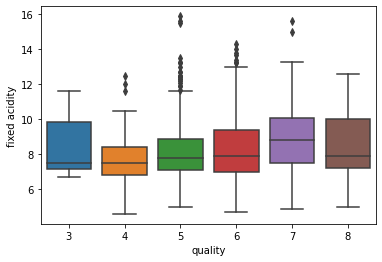

In [34]:
sns.boxplot(y = W["fixed acidity"] , x = W["quality"])

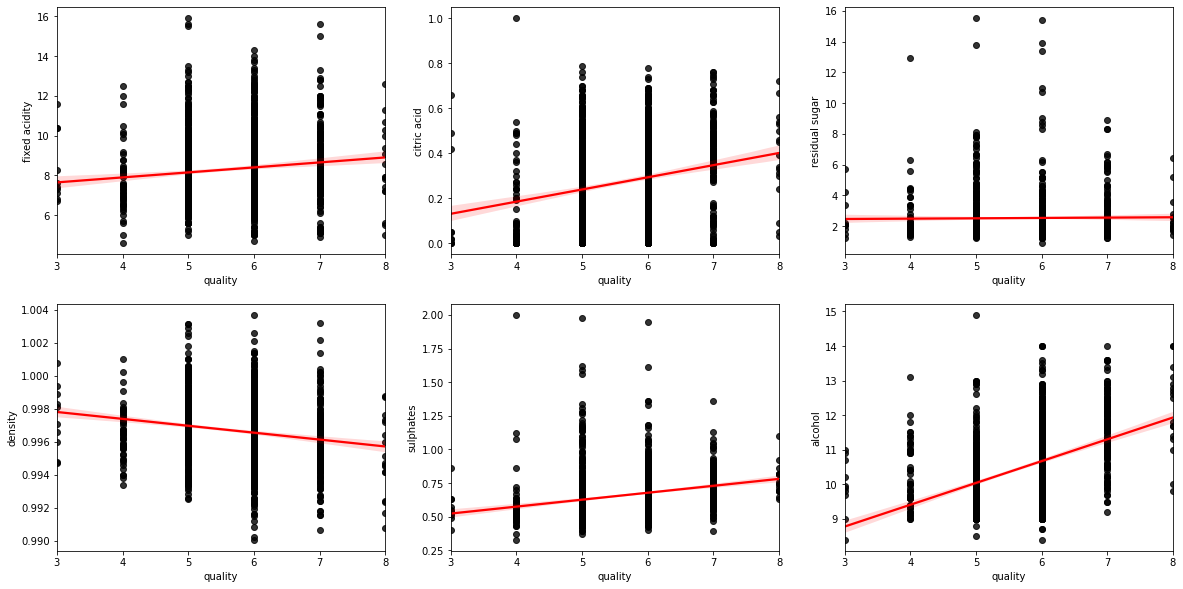

In [35]:
plt.figure(figsize = (20,10))
for i,(y,x) in enumerate([['fixed acidity','quality'],['citric acid','quality'],['residual sugar','quality'],
                          ['density','quality'],['sulphates','quality'],['alcohol','quality']]):
    plt.subplot(2,3,i+1)
    sns.regplot(x = x, y = y,data = W, scatter_kws={"color": "black"}, line_kws={"color": "red"} , truncate=True)
plt.show()

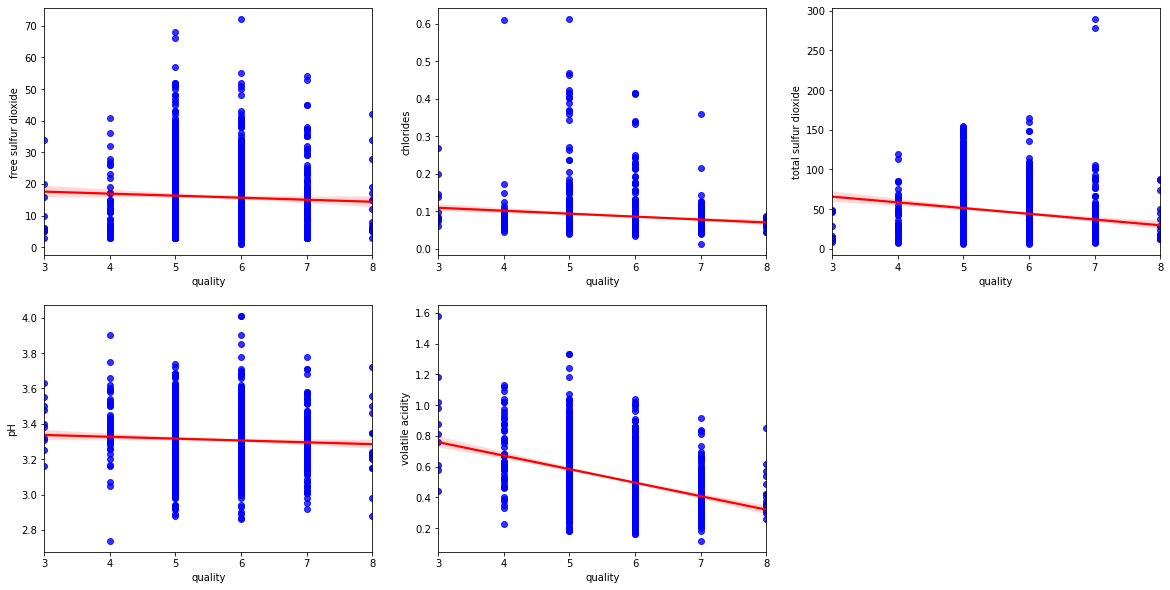

In [36]:
plt.figure(figsize = (20,10))
for i,(y,x) in enumerate([['free sulfur dioxide','quality'],['chlorides','quality'],['total sulfur dioxide','quality'],
                          ['pH','quality'],['volatile acidity','quality']]):
    plt.subplot(2,3,i+1)
    sns.regplot(x = x, y = y,data = W, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

In [37]:
sns.jointplot?

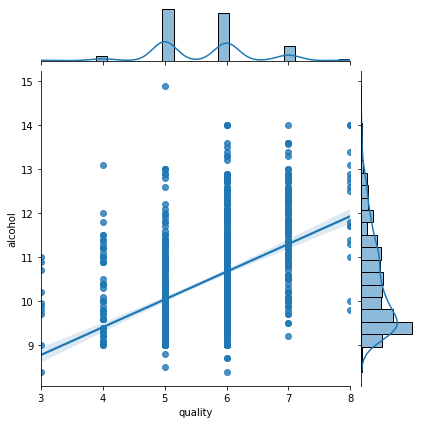

In [38]:
sns.jointplot(y = W["alcohol"] , x = W['quality'] , kind='reg')

<AxesSubplot:xlabel='quality', ylabel='index'>

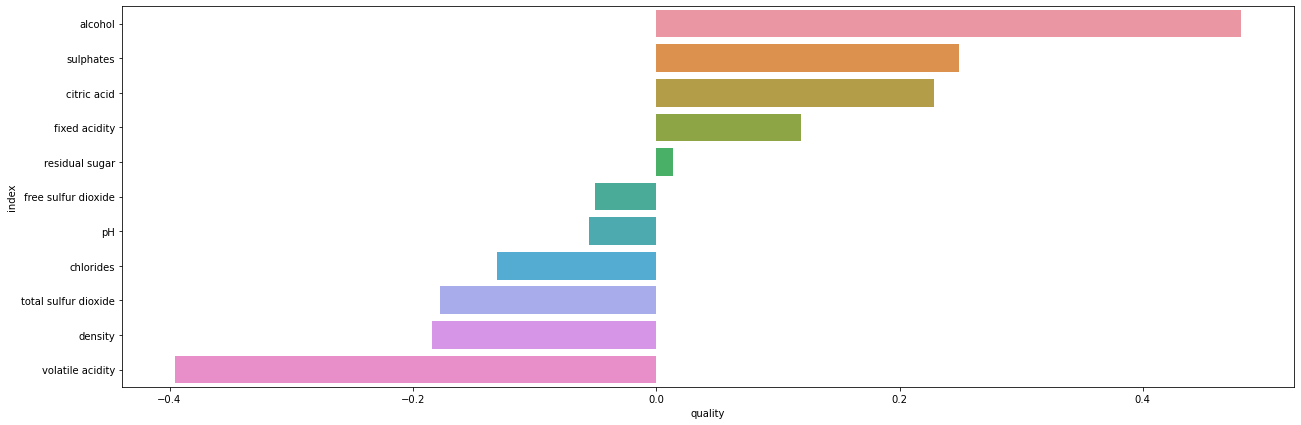

In [39]:
plt.figure(figsize=(21,7))
sns.barplot(y= 'index',x = 'quality' ,data = W.corr()['quality'].sort_values(ascending = False).reset_index().iloc[1:,:])

Quality of wine is positively impacted most by alcohol content followed by sulphates, citric acid and fixed acidity.

Quality is adversely affected by volatile acidity, density, total sulfur dioxide and chlorides. 

pH range should be ideally between 3.0 to 3.6. 

Free sulphur dioxide should be between 5 to 30

Alcohol 10 to 14%

citric acid 0 to 0.7

Volatile acidity 0.1 to 1

Density 0.991 to 1.000

Total sulfur dioxide 6 to 100

Chlorides 0.8 to 0.15

Fixed acidity 3 to 13